In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/nikitaandrea/Downloads/heart_failure.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [6]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

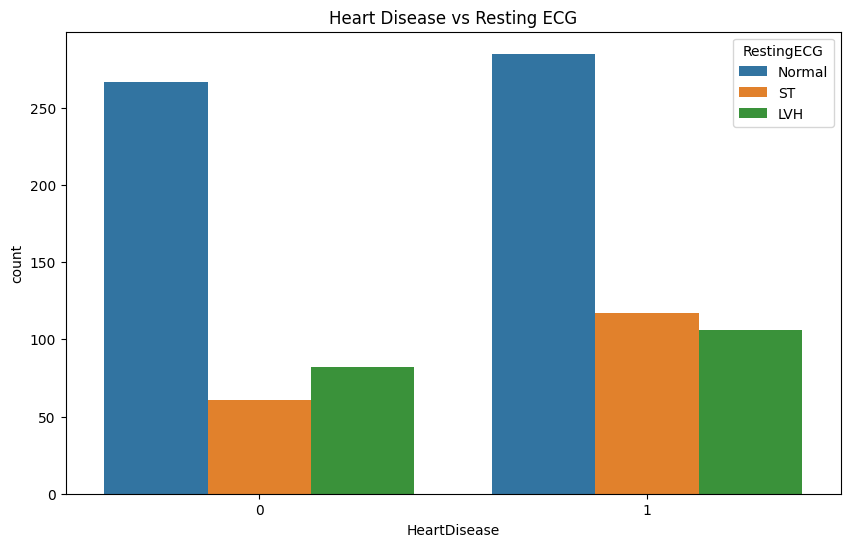

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HeartDisease', hue='RestingECG')
plt.title('Heart Disease vs Resting ECG')
plt.show()

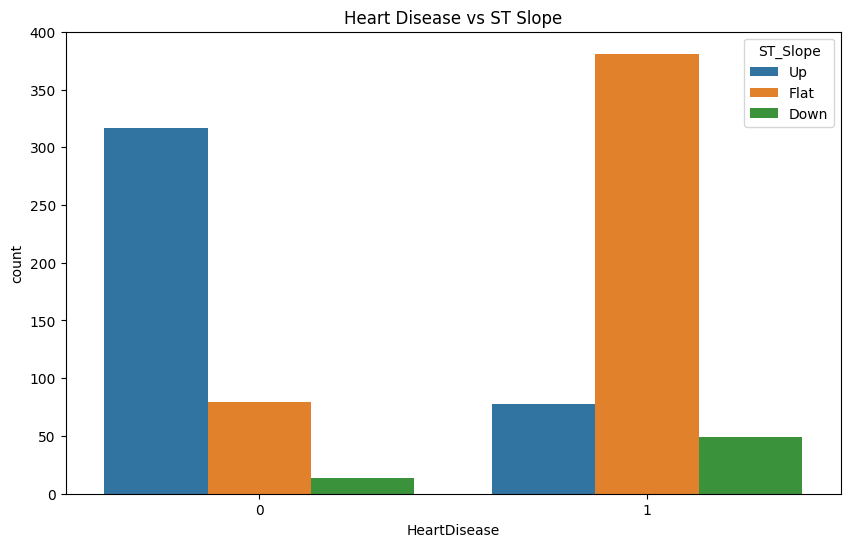

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HeartDisease', hue='ST_Slope')
plt.title('Heart Disease vs ST Slope')
plt.show()

In [9]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Terapkan OneHotEncoder pada kolom 'sex' dan 'chestpaintype'
encoded_features = encoder.fit_transform(df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

# Buat DataFrame dari hasil encoding
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']))

# Gabungkan hasil encoding dengan DataFrame asli
df_encoded = pd.concat([df.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1), encoded_df], axis=1)

print(df_encoded)


     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0      0.0 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


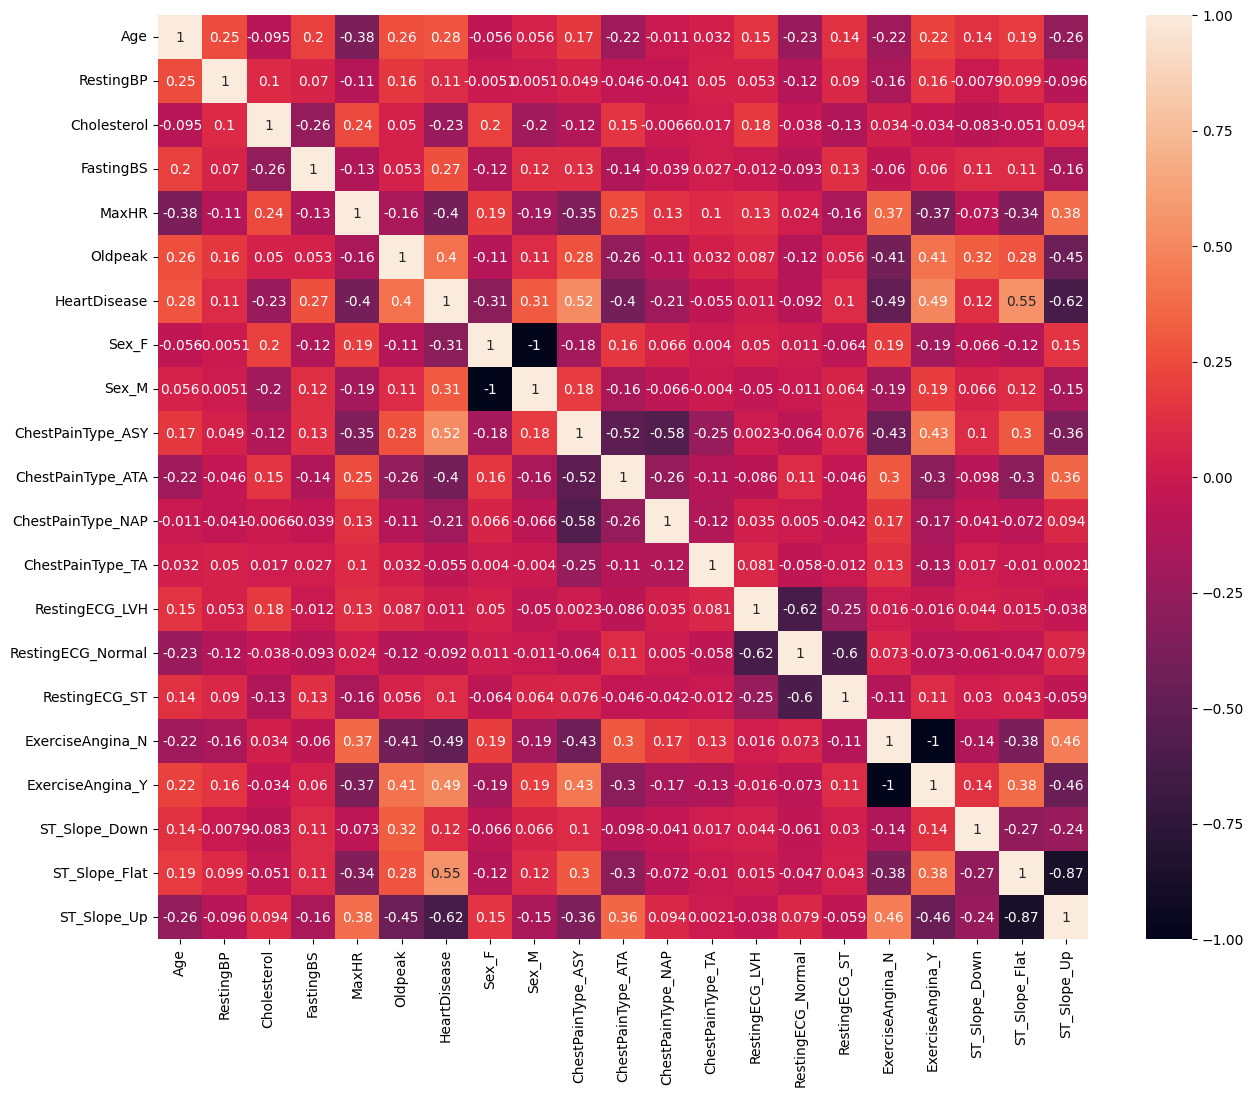

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 12))
sns.heatmap(df_encoded.corr(),annot=True)
plt.show()

In [14]:
X = df_encoded.drop(columns=['HeartDisease'])  # Menghapus kolom 'target' dan menyimpan sisanya sebagai fitur
y = df_encoded['HeartDisease'] 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Akurasi: 0.8804347826086957
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



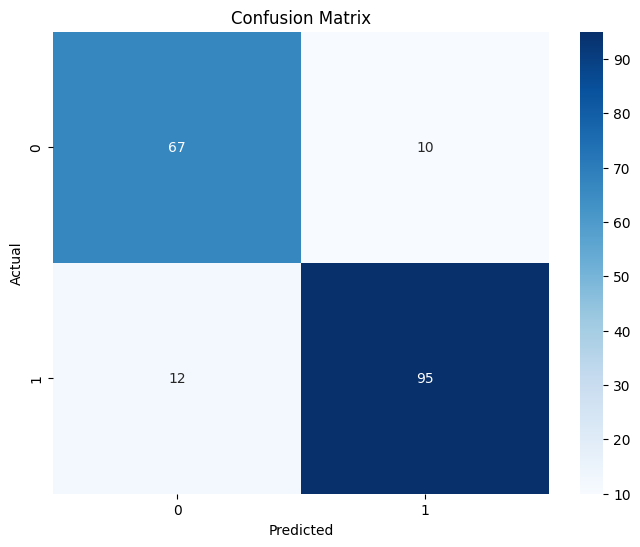

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Membuat model Random Forest
model = RandomForestClassifier(random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Akurasi: {accuracy}')
print(f'Classification Report:\n{report}')

# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
import pickle

In [18]:
filename = 'penyakit-jantung.sav'
pickle.dump(RandomForestClassifier, open(filename, 'wb'))